In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_3/'

In [11]:
temp_ym34_1_mod = xr.open_dataset(input_path + 'temp_ym34_1_mod.nc').temp_ym34_1_mod
print(temp_ym34_1_mod)
temp_ym34_1_slope_mod = xr.open_dataset(input_path + 'temp_ym34_1_slope_mod.nc').temp_ym34_1_slope_mod*10
print(temp_ym34_1_slope_mod)
temp_ym34_1_p_value_mod = xr.open_dataset(input_path + 'temp_ym34_1_p_value_mod.nc').temp_ym34_1_p_value_mod
print(temp_ym34_1_p_value_mod)
temp_ym34_1_std_err_mod = xr.open_dataset(input_path + 'temp_ym34_1_std_err_mod.nc').temp_ym34_1_std_err_mod*10
print(temp_ym34_1_std_err_mod)

temp_ym34_025_mod = xr.open_dataset(input_path + 'temp_ym34_025_mod.nc').temp_ym34_025_mod
print(temp_ym34_025_mod)
temp_ym34_025_slope_mod = xr.open_dataset(input_path + 'temp_ym34_025_slope_mod.nc').temp_ym34_025_slope_mod*10
print(temp_ym34_025_slope_mod)
temp_ym34_025_p_value_mod = xr.open_dataset(input_path + 'temp_ym34_025_p_value_mod.nc').temp_ym34_025_p_value_mod
print(temp_ym34_025_p_value_mod)
temp_ym34_025_std_err_mod = xr.open_dataset(input_path + 'temp_ym34_025_std_err_mod.nc').temp_ym34_025_std_err_mod*10
print(temp_ym34_025_std_err_mod)

temp_ym34_01_mod = xr.open_dataset(input_path + 'temp_ym34_01_mod.nc').temp_ym34_01_mod
print(temp_ym34_01_mod)
temp_ym34_01_slope_mod = xr.open_dataset(input_path + 'temp_ym34_01_slope_mod.nc').temp_ym34_01_slope_mod*10
print(temp_ym34_01_slope_mod)
temp_ym34_01_p_value_mod = xr.open_dataset(input_path + 'temp_ym34_01_p_value_mod.nc').temp_ym34_01_p_value_mod
print(temp_ym34_01_p_value_mod)
temp_ym34_01_std_err_mod = xr.open_dataset(input_path + 'temp_ym34_01_std_err_mod.nc').temp_ym34_01_std_err_mod*10
print(temp_ym34_01_std_err_mod)

temp_ym34_argo = xr.open_dataset(input_path + 'temp_ym34_argo.nc').__xarray_dataarray_variable__
print(temp_ym34_argo)
temp_ym34_slope_argo = xr.open_dataset(input_path + 'temp_ym34_slope_argo.nc').temp*10
print(temp_ym34_slope_argo)
temp_ym34_p_value_argo = xr.open_dataset(input_path + 'temp_ym34_p_value_argo.nc').temp
print(temp_ym34_p_value_argo)
temp_ym34_std_err_argo = xr.open_dataset(input_path + 'temp_ym34_std_err_argo.nc').temp*10
print(temp_ym34_std_err_argo)

<xarray.DataArray 'temp_ym34_1_mod' (st_ocean: 35, xt_ocean: 30, year: 14)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [18.158304, 18.607513, ..., 19.425343, 18.996883],
        [18.368041, 18.821174, ..., 19.574199, 19.189669]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [18.139717, 18.585027, ..., 19.401303, 18.977253],
        [18.350088, 18.802361, ..., 19.55678 , 19.173212]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       n

In [34]:
v_ym34_1_mod = xr.open_dataset(input_path + 'v_ym34_1_mod.nc').v_ym34_1_mod
print(v_ym34_1_mod)
v_ym34_1_slope_mod = xr.open_dataset(input_path + 'v_ym34_1_slope_mod.nc').v_ym34_1_slope_mod*10*100
print(v_ym34_1_slope_mod)
v_ym34_1_p_value_mod = xr.open_dataset(input_path + 'v_ym34_1_p_value_mod.nc').v_ym34_1_p_value_mod
print(v_ym34_1_p_value_mod)
v_ym34_1_std_err_mod = xr.open_dataset(input_path + 'v_ym34_1_std_err_mod.nc').v_ym34_1_std_err_mod*10
print(v_ym34_1_std_err_mod)

v_ym34_025_mod = xr.open_dataset(input_path + 'v_ym34_025_mod.nc').v_ym34_025_mod
print(v_ym34_025_mod)
v_ym34_025_slope_mod = xr.open_dataset(input_path + 'v_ym34_025_slope_mod.nc').v_ym34_025_slope_mod*10*100
print(v_ym34_025_slope_mod)
v_ym34_025_p_value_mod = xr.open_dataset(input_path + 'v_ym34_025_p_value_mod.nc').v_ym34_025_p_value_mod
print(v_ym34_025_p_value_mod)
v_ym34_025_std_err_mod = xr.open_dataset(input_path + 'v_ym34_025_std_err_mod.nc').v_ym34_025_std_err_mod*10
print(v_ym34_025_std_err_mod)

v_ym34_01_mod = xr.open_dataset(input_path + 'v_ym34_01_mod.nc').v_ym34_01_mod
print(v_ym34_01_mod)
v_ym34_01_slope_mod = xr.open_dataset(input_path + 'v_ym34_01_slope_mod.nc').v_ym34_01_slope_mod*10*100
print(v_ym34_01_slope_mod)
v_ym34_01_p_value_mod = xr.open_dataset(input_path + 'v_ym34_01_p_value_mod.nc').v_ym34_01_p_value_mod
print(v_ym34_01_p_value_mod)
v_ym34_01_std_err_mod = xr.open_dataset(input_path + 'v_ym34_01_std_err_mod.nc').v_ym34_01_std_err_mod*10
print(v_ym34_01_std_err_mod)

<xarray.DataArray 'v_ym34_1_mod' (st_ocean: 35, xu_ocean: 31, year: 14)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [-0.036428, -0.055357, ..., -0.058909, -0.052705]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [-0.038534, -0.057114, ..., -0.059365, -0.053564]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan,

Bbox(x0=0.125, y0=0.7158695652173913, x1=0.29347826086956524, y1=0.88)
[0.125, 0.7058695652173913, 0.31097826086956526, 0.86]
Bbox(x0=0.3271739130434783, y0=0.7158695652173913, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.7058695652173913, 0.5131521739130435, 0.86]
Bbox(x0=0.5293478260869566, y0=0.7158695652173913, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.7058695652173913, 0.7153260869565218, 0.86]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Bbox(x0=0.7315217391304348, y0=0.7158695652173913, x1=0.9000000000000001, y1=0.88)
[0.8215217391304348, 0.7058695652173913, 1.0075, 0.86]
Bbox(x0=0.125, y0=0.5189130434782608, x1=0.29347826086956524, y1=0.6830434782608695)
[0.125, 0.5189130434782608, 0.31097826086956526, 0.6730434782608695]
Bbox(x0=0.3271739130434783, y0=0.5189130434782608, x1=0.4956521739130435, y1=0.6830434782608695)
[0.3271739130434783, 0.5189130434782608, 0.5131521739130435, 0.6730434782608695]
Bbox(x0=0.5293478260869566, y0=0.5189130434782608, x1=0.6978260869565218, y1=0.6830434782608695)
[0.5293478260869566, 0.5189130434782608, 0.7153260869565218, 0.6730434782608695]
Bbox(x0=0.7315217391304348, y0=0.5189130434782608, x1=0.9000000000000001, y1=0.6830434782608695)
[0.8215217391304348, 0.5189130434782608, 1.0075, 0.6730434782608695]
Bbox(x0=0.125, y0=0.32195652173913036, x1=0.29347826086956524, y1=0.4860869565217391)
[0.125, 0.32195652173913036, 0.31097826086956526, 0.4760869565217391]
Bbox(x0=0.3271739130434783, y0

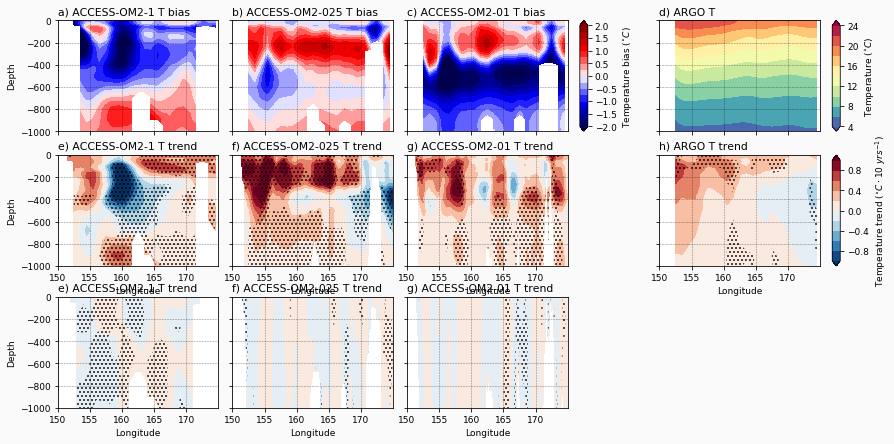

In [33]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,10), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 9})    

row=4
col=4

ax = plt.subplot(row, col, 1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.01, pos.x1+0.0175, pos.y1-0.02] 
print(pos_plot)
levels=arange(-2,2,0.25)
cmap = plt.cm.seismic
data = \
temp_ym34_1_mod.mean('year').interp(xt_ocean=temp_ym34_argo.LONGITUDE).interp(st_ocean=temp_ym34_argo.PRESSURE) - \
temp_ym34_argo.mean('year')
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 T bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Depth')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.01, pos.x1+0.0175, pos.y1-0.02] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = \
temp_ym34_025_mod.mean('year').interp(xt_ocean=temp_ym34_argo.LONGITUDE).interp(st_ocean=temp_ym34_argo.PRESSURE) - \
temp_ym34_argo.mean('year')
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 T bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 3)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.01, pos.x1+0.0175, pos.y1-0.02] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = \
temp_ym34_01_mod.mean('year').interp(xt_ocean=temp_ym34_argo.LONGITUDE).interp(st_ocean=temp_ym34_argo.PRESSURE) - \
temp_ym34_argo.mean('year')
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 T bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'Temperature bias ($^{\circ}C$)', cax=axins)


ax = plt.subplot(row, col, 4)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0-0.01, pos.x1+0.1075, pos.y1-0.02] 
print(pos_plot)
levels=arange(4,24,2)
cmap = plt.cm.Spectral_r
data = temp_ym34_argo.mean('year')
plot = plt.contourf(data.LONGITUDE, data.PRESSURE, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('d) ARGO T', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'Temperature ($^{\circ}C$)', cax=axins)


ax = plt.subplot(row, col, 5)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_ym34_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym34_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 T trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Depth')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 6)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_ym34_025_slope_mod
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym34_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 T trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 7)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_ym34_01_slope_mod
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym34_01_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 T trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 8)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0, pos.x1+0.1075, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_ym34_slope_argo
plot = plt.contourf(data.lon, data.depth, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym34_p_value_argo
plot2 = plt.contourf(data.lon, data.depth, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('h) ARGO T trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'Temperature trend ($^{\circ}C \cdot 10\ yrs^{-1}$)', cax=axins)

# savefigure('temp_ym34_absolute')


ax = plt.subplot(row, col, 9)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = v_ym34_1_slope_mod
plot = plt.contourf(data.xu_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = v_ym34_1_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 T trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Depth')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 10)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = v_ym34_025_slope_mod
plot = plt.contourf(data.xu_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = v_ym34_025_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 T trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 11)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = v_ym34_01_slope_mod
plot = plt.contourf(data.xu_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = v_ym34_01_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 T trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

Bbox(x0=0.125, y0=0.32195652173913036, x1=0.29347826086956524, y1=0.4860869565217391)
[0.125, 0.32195652173913036, 0.31097826086956526, 0.4760869565217391]
Bbox(x0=0.3271739130434783, y0=0.32195652173913036, x1=0.4956521739130435, y1=0.4860869565217391)
[0.3271739130434783, 0.32195652173913036, 0.5131521739130435, 0.4760869565217391]
Bbox(x0=0.5293478260869566, y0=0.32195652173913036, x1=0.6978260869565218, y1=0.4860869565217391)
[0.5293478260869566, 0.32195652173913036, 0.7153260869565218, 0.4760869565217391]


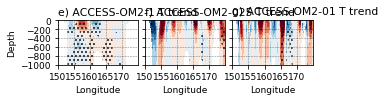

In [40]:
ax = plt.subplot(row, col, 9)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
levels=arange(-5,5,1)
cmap = plt.cm.RdBu_r
data = v_ym34_1_slope_mod
plot = plt.contourf(data.xu_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = v_ym34_1_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 T trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Depth')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 10)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = v_ym34_025_slope_mod
plot = plt.contourf(data.xu_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = v_ym34_025_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 T trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 11)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = v_ym34_01_slope_mod
plot = plt.contourf(data.xu_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = v_ym34_01_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 T trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 170, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
plt.ylim([-1000, 0]), plt.xlim([150, 175])
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

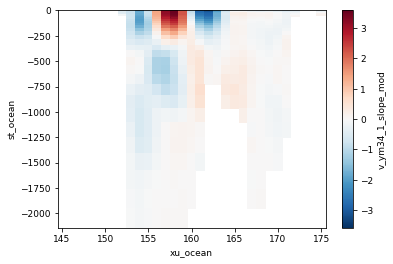

In [42]:
v_ym34_1_slope_mod.plot()